In [3]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/spam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train = pd.read_csv("/TrainDataset (1).csv")
df_test = pd.read_csv("/TestDataset (1).csv")

In [6]:
train = df_train
test = df_test

In [7]:
df_train.head()

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [8]:
df_train = df_train.rename(columns = {'v1':'class_label','v2':'message'})
df_test = df_test.rename(columns = {'v2':'message'})

In [9]:
df_train.head()

,class_label,message
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [10]:
df_train.shape

(4457, 2)

In [11]:
df_test.head()

,message
0,Prabha..i'm soryda..realy..frm heart i'm sory
1,"Jus chillaxin, what up"
2,Ok no prob. Take ur time.
3,Congrats! 2 mobile 3G Videophones R yours. cal...
4,Thankyou so much for the call. I appreciate yo...


In [12]:
df_test.shape

(1115, 1)

In [13]:
class_label = df_train['class_label']

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  4457 non-null   object
 1   message      4457 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


In [15]:
df_train.groupby('class_label').describe()

message                                                            \
              count unique                                                top   
class_label                                                                     
ham            3868   3659                             Sorry, I'll call later   
spam            589    534  Please call our customer service representativ...   

                  
            freq  
class_label       
ham           28  
spam           4

In [16]:
df_train['length'] = df_train['message'].apply(len)
df_train.head()

,class_label,message,length
0,spam,U were outbid by simonwatson5120 on the Shinco...,133
1,ham,Do you still have the grinder?,30
2,ham,No. Yes please. Been swimming?,30
3,ham,No de.am seeing in online shop so that i asked.,47
4,ham,"Faith makes things possible,Hope makes things ...",133


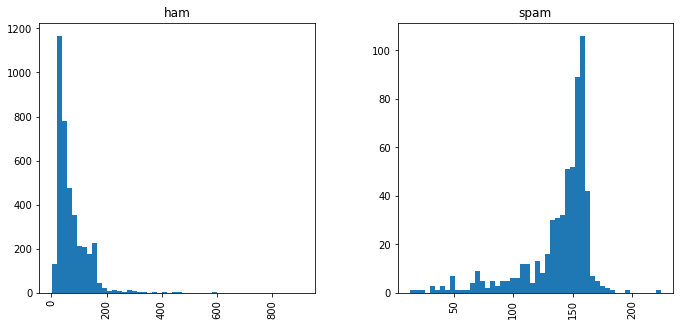

In [17]:
df_train.hist(column='length', by='class_label', bins=50,figsize=(11,5))
plt.show()

In [18]:
df_train.class_label.value_counts()

ham     3868
spam     589
Name: class_label, dtype: int64

In [19]:
df_train.class_label.value_counts(normalize=True)

ham     0.867848
spam    0.132152
Name: class_label, dtype: float64

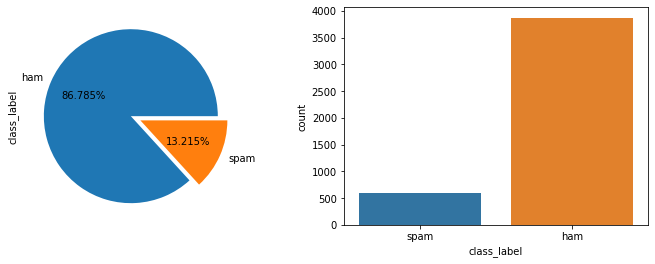

In [20]:
f,ax=plt.subplots(1,2, figsize=(12,4))
df_train.class_label.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('class_label',data=df_train)
plt.show()

In [21]:
df_train.drop('class_label',axis=1,inplace=True)
df_train.drop('length',axis=1,inplace=True)

In [22]:
df_train = df_train.append(df_test)
sms = df_train.message
sms.head()

0    U were outbid by simonwatson5120 on the Shinco...
1                       Do you still have the grinder?
2                       No. Yes please. Been swimming?
3      No de.am seeing in online shop so that i asked.
4    Faith makes things possible,Hope makes things ...
Name: message, dtype: object

In [23]:
final_sms = sms.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
final_sms = final_sms.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
final_sms = final_sms.str.replace(r'£|\$', 'money-symbol')

In [24]:
final_sms = final_sms.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')
final_sms = final_sms.str.replace(r'\d+(\.\d+)?', 'number')
final_sms = final_sms.str.replace(r'[^\w\d\s]', ' ')

In [25]:
final_sms = final_sms.str.replace(r'\s+', ' ')
final_sms = final_sms.str.replace(r'^\s+|\s*?$', ' ')
final_sms = final_sms.str.lower()
final_sms

0       u were outbid by simonwatsonnumber on the shin...
1                         do you still have the grinder  
2                           no yes please been swimming  
3        no de am seeing in online shop so that i asked  
4       faith makes things possible hope makes things ...
                              ...                        
1110    yo chad which gymnastics class do you wanna ta...
1111    god created gap btwn ur fingers so dat sumnumb...
1112        i m working technical support voice process  
1113                      i told your number to gautham  
1114                   well she s in for a big surprise  
Name: message, Length: 5572, dtype: object

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
stop_words = set(stopwords.words('english'))
final_sms = final_sms.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [33]:
import nltk
ps = nltk.PorterStemmer()
final_sms = final_sms.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [34]:
final_sms

0       u were outbid by simonwatsonnumb on the shinco...
1                           do you still have the grinder
2                                   no ye pleas been swim
3                no de am see in onlin shop so that i ask
4       faith make thing possibl hope make thing work ...
                              ...                        
1110    yo chad which gymnast class do you wanna take ...
1111    god creat gap btwn ur finger so dat sumnumb vr...
1112                i m work technic support voic process
1113                        i told your number to gautham
1114                      well she s in for a big surpris
Name: message, Length: 5572, dtype: object

In [68]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [70]:
all_words = []
for sms in final_sms:
  words = word_tokenize(sms)
  for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)  
       

In [71]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 6493


In [72]:
print('10 most common words: {}'.format(all_words.most_common(10)))

10 most common words: [('number', 2739), ('u', 1192), ('call', 672), ('go', 453), ('get', 451), ('ur', 385), ('thi', 342), ('symbolnumb', 325), ('gt', 318), ('lt', 316)]


In [73]:
temp = []
for (i,j) in all_words.most_common(1200):
    temp.append(i)

In [74]:
temp

['number',
 'u',
 'call',
 'go',
 'get',
 'ur',
 'thi',
 'symbolnumb',
 'gt',
 'lt',
 'åmoney',
 'come',
 'ok',
 'free',
 'know',
 'day',
 'love',
 'like',
 'time',
 'got',
 'good',
 'want',
 'wa',
 'text',
 'onli',
 'send',
 'hi',
 'txt',
 'need',
 'one',
 'today',
 'take',
 'see',
 'home',
 'stop',
 'think',
 'repli',
 'r',
 'lor',
 'sorri',
 'still',
 'tell',
 'numberp',
 'mobil',
 'n',
 'back',
 'da',
 'make',
 'k',
 'dont',
 'phone',
 'week',
 'plea',
 'say',
 'new',
 'work',
 'later',
 'pl',
 'ani',
 'ask',
 'hope',
 'ha',
 'co',
 'miss',
 'meet',
 'msg',
 'messag',
 'dear',
 'night',
 'wait',
 'happi',
 'ì_',
 'c',
 'well',
 'thing',
 'much',
 'great',
 'claim',
 'min',
 'oh',
 'tri',
 'wat',
 'give',
 'hey',
 'na',
 'friend',
 'thank',
 'ye',
 'way',
 'www',
 'let',
 'e',
 'feel',
 'prize',
 'right',
 'wan',
 'tomorrow',
 'even',
 'alreadi',
 'pick',
 'cash',
 'said',
 'leav',
 'yeah',
 'realli',
 'care',
 'amp',
 'tone',
 'babe',
 'im',
 'whi',
 'b',
 'win',
 'morn',
 'find',


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(final_sms)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
train.shape

(4457, 2)

In [78]:
test.shape

(1115, 1)

In [80]:
df_test = tfidf_data.iloc[-1115:]
df_train = tfidf_data.iloc[:4457]
df_train['class_label'] = class_label

In [81]:
df_train.shape

(4457, 6474)

In [82]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,6464,6465,6466,6467,6468,6469,6470,6471,6472,class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [83]:
X = df_train.drop('class_label',axis=1)
Y = class_label

In [84]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)

In [85]:
print(len(X_train))
print(len(X_test))

3565
892


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc_mod = RandomForestClassifier(n_estimators=50,max_depth=12, random_state=101,
                             class_weight='balanced',verbose=1,n_jobs=-1)

In [88]:
rfc_mod.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=50,
                       n_jobs=-1, random_state=101, verbose=1)

In [91]:
y_pred_rfc = rfc_mod.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [92]:
y_pred_rfc 

array(['ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
  

In [93]:
print("F1 Score :",f1_score(y_pred_rfc,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_rfc))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_rfc))

F1 Score : 0.9846297273997047
Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       764
        spam       0.99      0.90      0.94       128

    accuracy                           0.98       892
   macro avg       0.99      0.95      0.97       892
weighted avg       0.98      0.98      0.98       892

Confusion Matrix: 
 [[763   1]
 [ 13 115]]


In [94]:
rfc_predicted = rfc_mod.predict(df_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [95]:
test_predicted= pd.DataFrame()
test_predicted['class_label'] = rfc_predicted
test_predicted.to_csv('test_predicted_rfc.csv',index=False)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dectre_mod = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5).fit(X_train, y_train)

In [98]:
dectre_mod.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [100]:
y_pred_dectre = dectre_mod.predict(X_test)
y_pred_dectre

array(['ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
   

In [101]:
print("F1 Score :",f1_score(y_pred_dectre,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_dectre))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_dectre))

F1 Score : 0.968852363123337
Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       764
        spam       0.97      0.80      0.88       128

    accuracy                           0.97       892
   macro avg       0.97      0.90      0.93       892
weighted avg       0.97      0.97      0.97       892

Confusion Matrix: 
 [[761   3]
 [ 26 102]]


In [103]:
dectre_predicted = dectre_mod.predict(df_test)
test_predicted= pd.DataFrame()
test_predicted['class_label'] = dectre_predicted
test_predicted.to_csv('test_predicted_DecisionTree.csv',index=False)

In [104]:
from sklearn.linear_model import LogisticRegression
logreg_mod = LogisticRegression(random_state=42).fit(X_train, y_train)

In [105]:
y_pred_logreg = logreg_mod.predict(X_test)
y_pred_logreg

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
   

In [106]:
print("F1 Score :",f1_score(y_pred_logreg,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_logreg))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_logreg))

F1 Score : 0.9772565166769963
Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       764
        spam       0.99      0.84      0.91       128

    accuracy                           0.98       892
   macro avg       0.98      0.92      0.95       892
weighted avg       0.98      0.98      0.98       892

Confusion Matrix: 
 [[763   1]
 [ 20 108]]


In [107]:
predicted_test = logreg_mod.predict(df_test)
test_predicted = pd.DataFrame()
test_predicted['class_label'] = predicted_test
test_predicted.to_csv('test_predicted_logisticRgrsn.csv',index=False)